# **BUSINESS QUESTIONS**

1. How do weather conditions and seasonal trends affect daily bike rentals?
2. How do weather conditions and time of day affect hourly bike rentals?

# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")

# **DATA WRANGLING**

**Gathering Data**

In [2]:
df_daily = pd.read_csv('day.csv')
df_hourly = pd.read_csv('hour.csv')

In [3]:
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**ASSESSING DATA - DAILY DATA**

In [5]:
print("Daily Dataset Info:")
print(df_daily.info())

Daily Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [6]:
print("\nHead of Daily Dataset:")
print(df_daily.head())


Head of Daily Dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [7]:
print("\nSummary Statistics (Daily):")
print(df_daily.describe())


Summary Statistics (Daily):
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486  

In [8]:
print("\nMissing Values (Daily):")
print(df_daily.isnull().sum())


Missing Values (Daily):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
print("\nDuplicate Records (Daily):")
print(df_daily.duplicated().sum())


Duplicate Records (Daily):
0


**ASSESSING DATA - HOURLY DATA**

In [10]:
print("\nHourly Dataset Info:")
print(df_hourly.info())


Hourly Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [11]:
print("\nHead of Hourly Dataset:")
print(df_hourly.head())


Head of Hourly Dataset:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [12]:
print("\nSummary Statistics (Hourly):")
print(df_hourly.describe())


Summary Statistics (Hourly):
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      

In [13]:
print("\nMissing Values (Hourly):")
print(df_hourly.isnull().sum())


Missing Values (Hourly):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [14]:
print("\nDuplicate Records (Hourly):")
print(df_hourly.duplicated().sum())


Duplicate Records (Hourly):
0


# **DATA CLEANING**

**CLEANING DATA - DAILY**

In [15]:
df_daily.dropna(inplace=True)
df_daily['dteday'] = pd.to_datetime(df_daily['dteday'])
df_daily.drop_duplicates(inplace=True)

**CLEANING DATA - HOURLY**

In [16]:
df_hourly.dropna(inplace=True)
df_hourly['dteday'] = pd.to_datetime(df_hourly['dteday'])
df_hourly.drop_duplicates(inplace=True)

# **EXPLORATORY DATA ANALYSIS (EDA)**

**EDA - DAILY DATA**

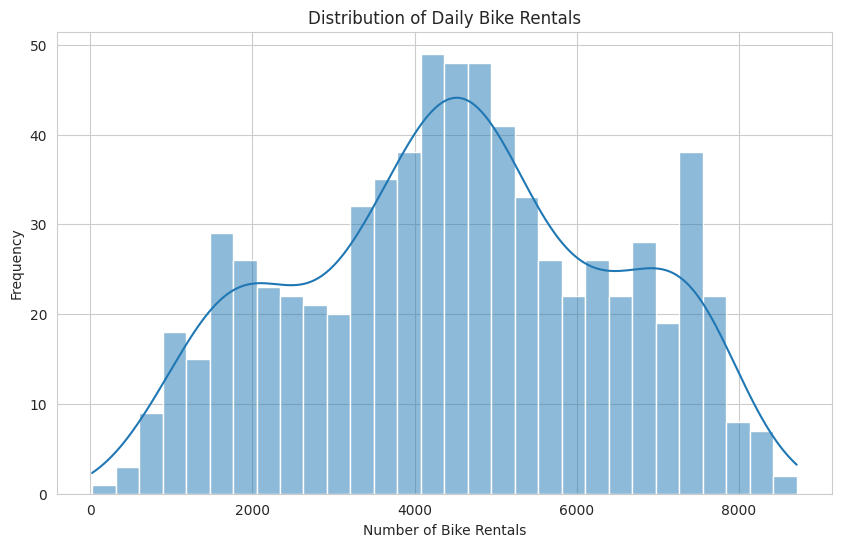

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_daily['cnt'], bins=30, kde=True)
plt.title('Distribution of Daily Bike Rentals')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

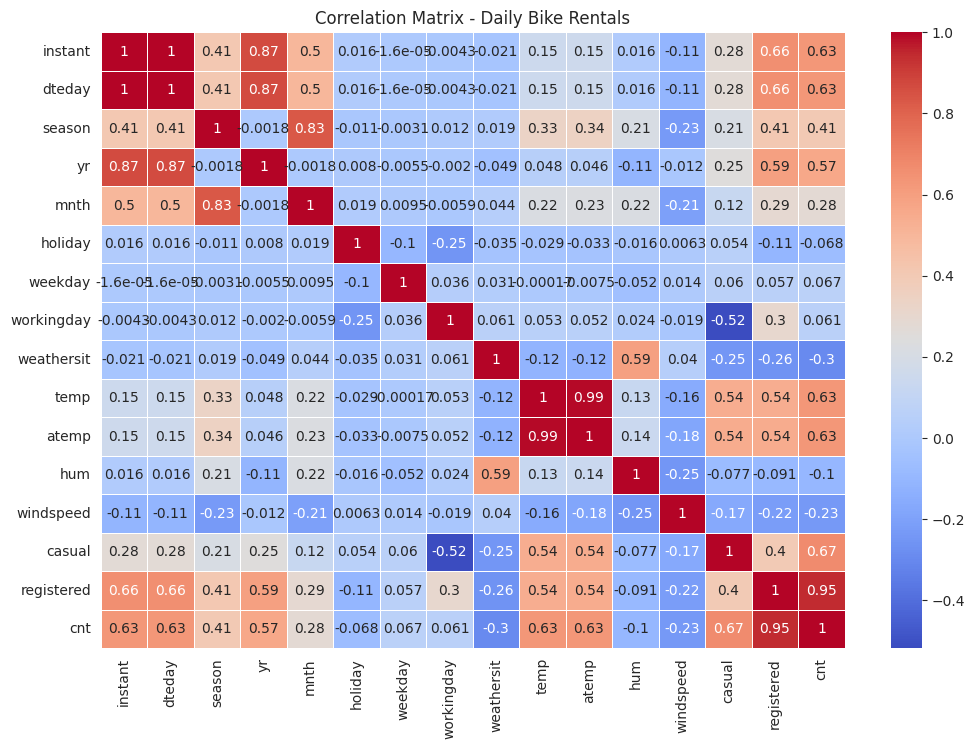

In [18]:
plt.figure(figsize=(12, 8))
corr_matrix = df_daily.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Daily Bike Rentals')
plt.show()

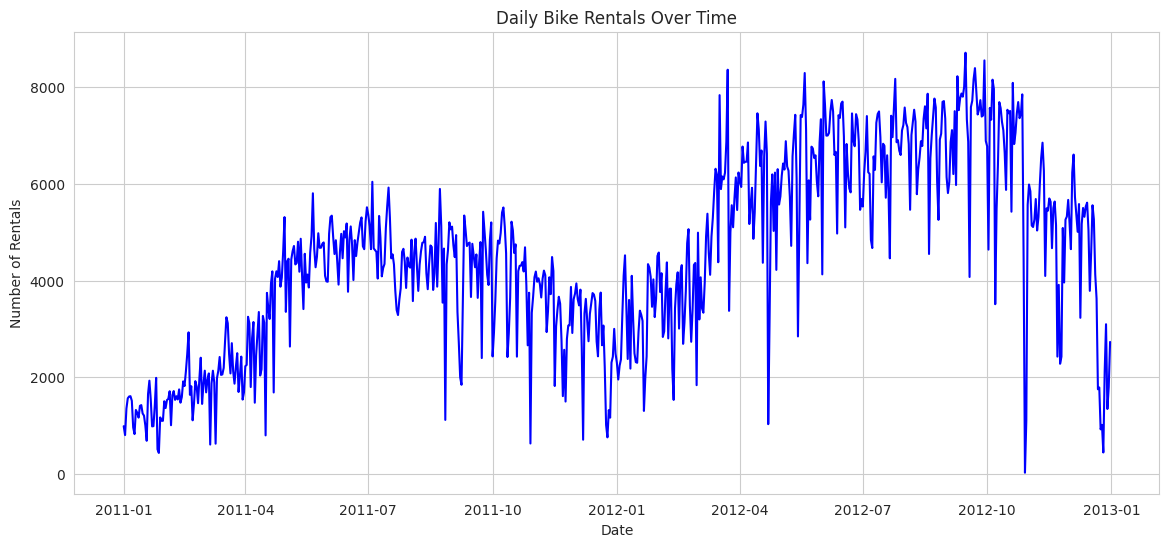

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df_daily['dteday'], df_daily['cnt'], color='blue')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.show()

**EDA - HOURLY DATA**

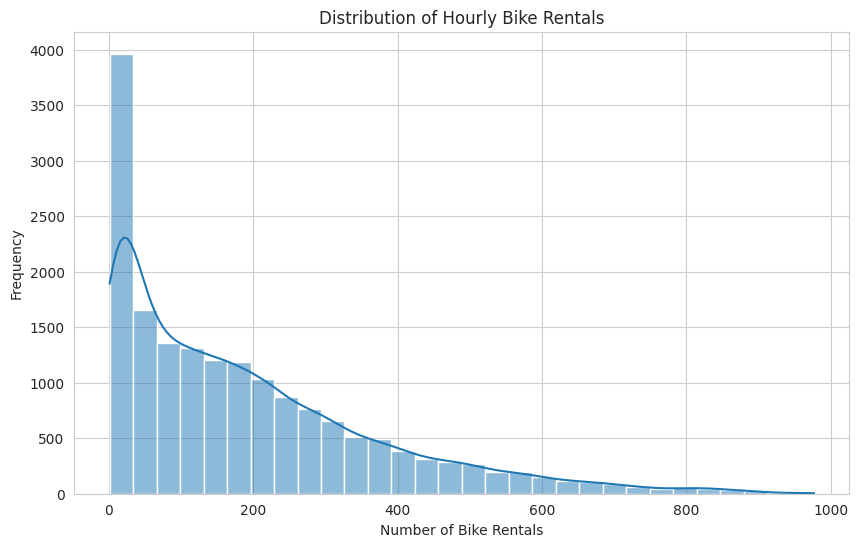

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_hourly['cnt'], bins=30, kde=True)
plt.title('Distribution of Hourly Bike Rentals')
plt.xlabel('Number of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

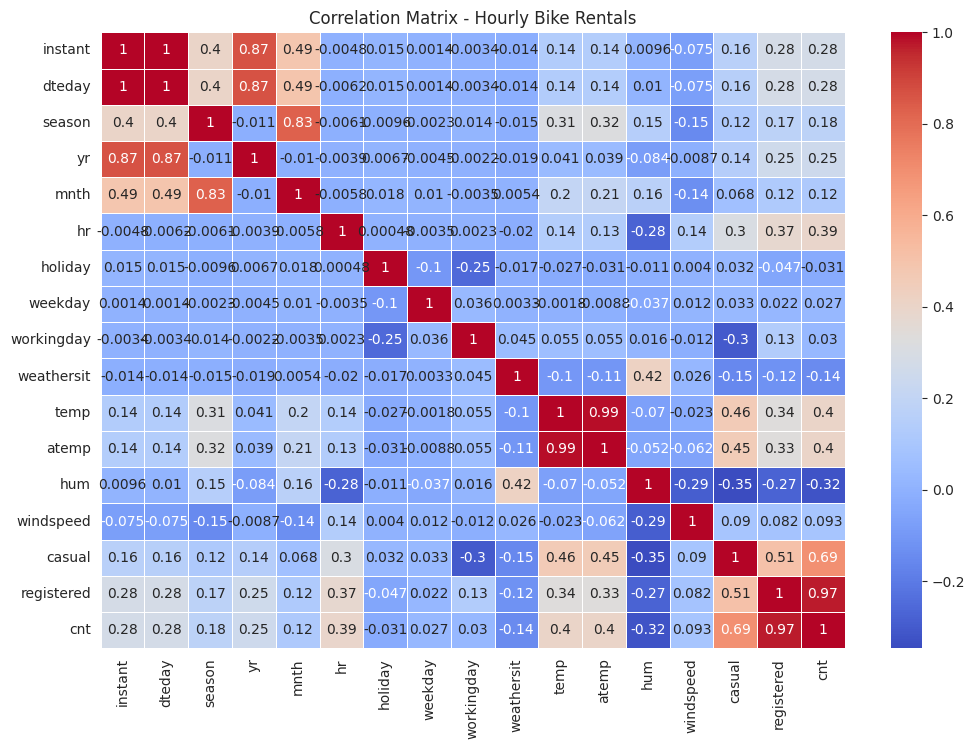

In [21]:
plt.figure(figsize=(12, 8))
corr_matrix_hourly = df_hourly.corr()
sns.heatmap(corr_matrix_hourly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Hourly Bike Rentals')
plt.show()

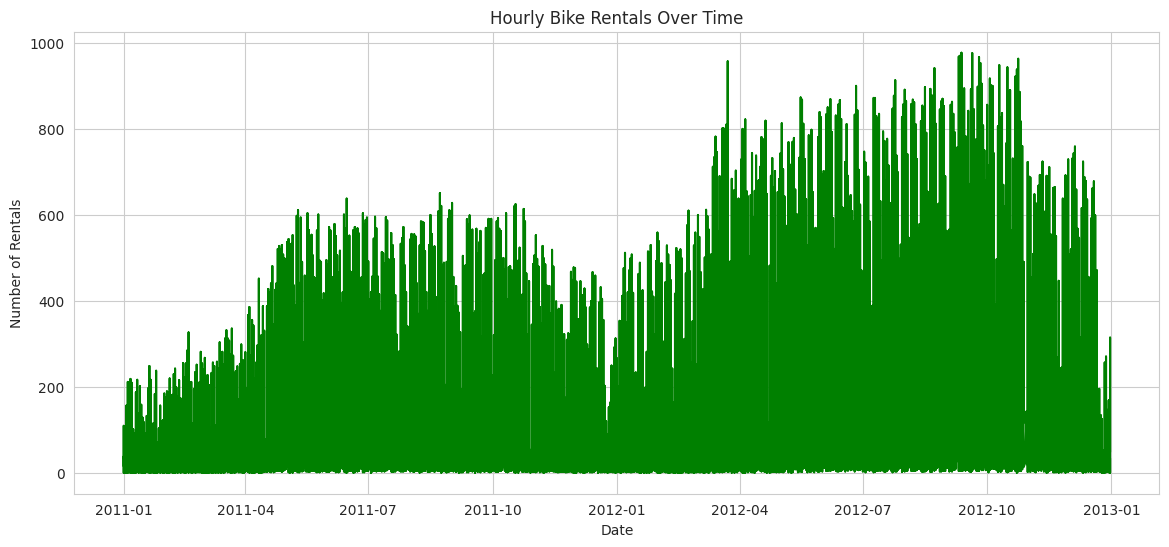

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(df_hourly['dteday'], df_hourly['cnt'], color='green')
plt.title('Hourly Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rentals')
plt.show()

# **VISUALIZATION & EXPLANATORY ANALYSIS**

**Question 1**

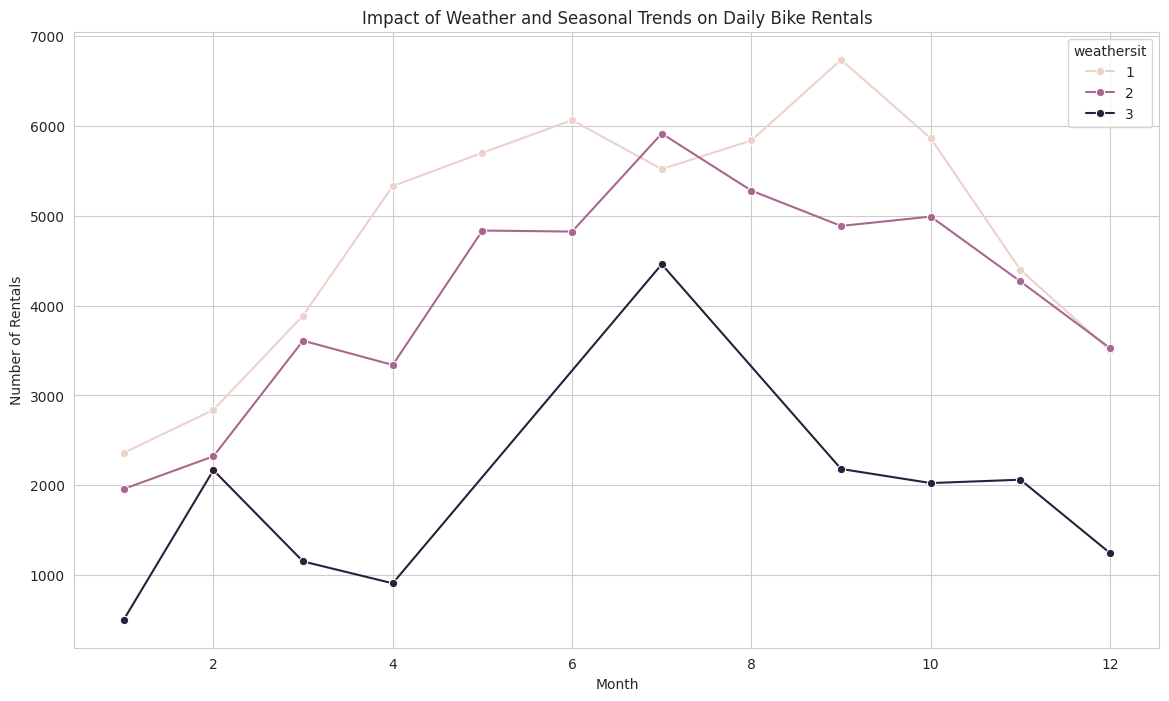

In [23]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='mnth', y='cnt', data=df_daily,
             hue='weathersit', marker='o', ci=None)

plt.title('Impact of Weather and Seasonal Trends on Daily Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

**Question 2**

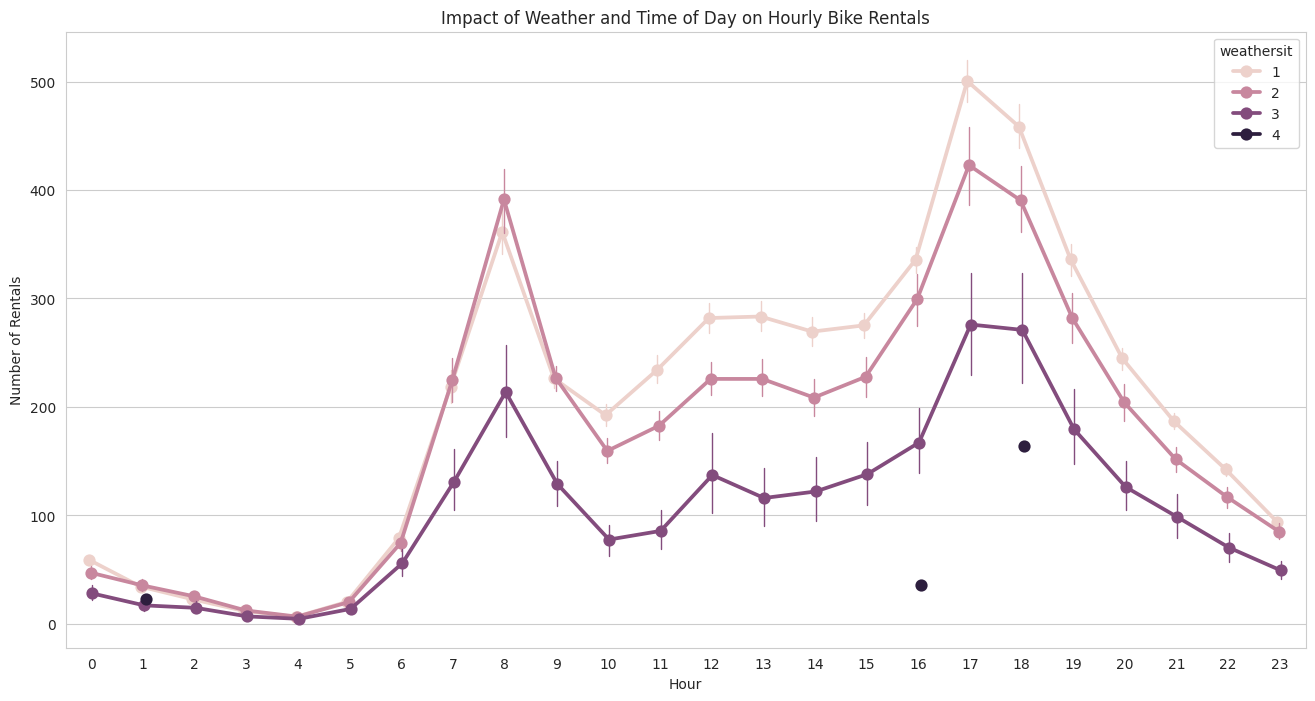

In [24]:
plt.figure(figsize=(16, 8))
sns.pointplot(x='hr', y='cnt', data=df_hourly,
              hue='weathersit',
              dodge=True, markers='o',
              linestyles='-', errwidth=1)

plt.title('Impact of Weather and Time of Day on Hourly Bike Rentals')
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.show()

# **Conclusions**

**Conclusion - Question 1**

Weather conditions significantly affect daily bike rental demand throughout the year.

Weather condition 1 produces the highest rental volume, especially during months 6 to 8.

Weather condition 2 also shows increased rentals during these months, but lower than condition 1.

Weather condition 3 generates the lowest rental volume throughout the year.

Overall, both weather and seasonality strongly influence daily rental activity.

**Conclusion - Question 2**

Weather conditions and time of day significantly influence hourly bike rental patterns.

Weather condition 1 shows the highest rental volume, peaking around 5 PM.

Weather condition 2 also demonstrates significant rentals, peaking around midday.

Weather condition 3 shows lower rental demand throughout the day.

Weather condition 4 results in consistently very low rental activity.

Overall, weather conditions and hourly trends have a strong impact on rental behavior.